In [ ]:
import sys
sys.path.append('/Users/sucheen/Documents/Personal/LLNL/Project/transformers/lib/python3.8/site-packages')
sys.path.append('../../Lab 1')
sys.path.append('../../Lab-2')
sys.path.append('../../Lab-3/Part 1')
sys.path.append('../../Lab-3/Part 2')
sys.path.append('../../Lab-4')
sys.path.append('../../Lab-5')
sys.path.append('../../Lab-6')
sys.path.append('../../Lab-7')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as matrix

from kmeans import *

# Data Overview
Dataset is a mental health in tech survey from Kaggle. It measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

In [ ]:
data = pd.read_csv('survey.csv').drop(['Timestamp'], axis=1)
data['Gender'] = data['Gender'].astype(str).apply(lambda x: x.lower()).apply(lambda x: 'male' if x == 'm' else x).apply(lambda x: 'female' if x == 'f' else x)
data

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,32,male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,46,female,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


# Data Cleaning & Preprocessing

The dataset has a lot of missing values. We will fill in the missing values with empty strings and then convert the categorical variables into dummy variables.

In [ ]:
data.fillna('', inplace=True)
data = data.drop(['comments'], axis=1)
data = pd.get_dummies(data).astype(int)
data.shape

(1259, 201)

# K-Means Clustering
Fit a KMeans Clustering with 3 clusters to the dataset.

In [ ]:
kmeans = KMeans(data, 3)
clusters, centroids = kmeans.clustering()
clusters.value_counts()

2    673
1    585
3      1
Name: count, dtype: int64

In [ ]:
data['kmeans cluster'] = clusters

([<matplotlib.axis.YTick at 0x12798f350>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

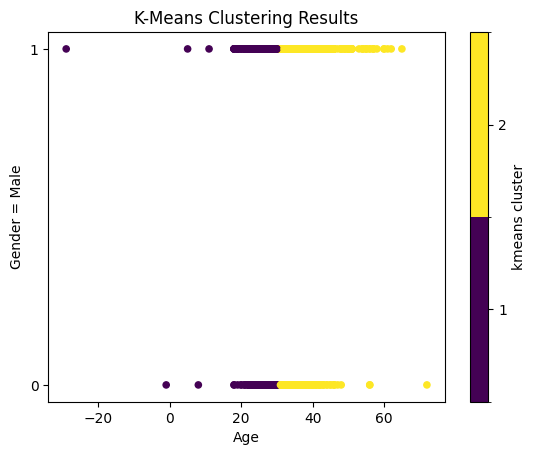

In [ ]:
data = data[data['Age'] <= 1e6]
data = data[data['Age'] > -1000]
data = data[data['Age'] < 300]
data['kmeans cluster'] = data['kmeans cluster'].astype('category')
data.plot(kind='scatter', x='Age', y='Gender_male', c='kmeans cluster', cmap='viridis')
plt.title("K-Means Clustering Results")
plt.xlabel("Age")
plt.ylabel("Gender = Male")
plt.yticks(np.arange(0, 2, 1))

# Clustering Aggregation Results

Below is a cluster assignment result of the treatment variable. The treatment variable is a binary variable that indicates whether the person has sought treatment for a mental health condition.

In [ ]:
data['kmeans cluster'] = data['kmeans cluster'].astype('int')
data.groupby('kmeans cluster').mean().T.loc['treatment_Yes']

kmeans cluster
1    0.472603
2    0.532738
Name: treatment_Yes, dtype: float64

# Attempt to do DBSCAN and Hierarchical Clustering

These were not successful.

In [ ]:
from dbscan_1 import *
cluster_list, core, noise, border = dbscan(data, 10, 3)

In [ ]:
pd.Series(cluster_list).value_counts()

In [ ]:
from hclustering import *
distance_matrix = distance_matrix(data)
dendrogram = hierarchical_clustering(distance_matrix)
clusters = cut_dendrogram(dendrogram, 0.15)
clusters

[[390],
 [715],
 [364],
 [1048],
 [1049],
 [848],
 [1008],
 [451],
 [566],
 [219],
 [1217],
 [890],
 [1076],
 [751],
 [736],
 [824],
 [292],
 [1190],
 [505],
 [508],
 [946],
 [1017],
 [872],
 [1010],
 [210],
 [513],
 [485],
 [923],
 [1130],
 [704],
 [926],
 [1091],
 [12],
 [8],
 [167],
 [589],
 [850],
 [506],
 [585],
 [1154],
 [137],
 [972],
 [1152],
 [1116],
 [831],
 [1114],
 [380],
 [564],
 [986],
 [1175],
 [740],
 [774],
 [1128],
 [636],
 [819],
 [821],
 [1251],
 [367],
 [1052],
 [7],
 [1229],
 [990],
 [1192],
 [73],
 [133],
 [935],
 [86],
 [501],
 [274],
 [185],
 [1112],
 [536],
 [1118],
 [154],
 [160],
 [514],
 [1087],
 [756],
 [815],
 [739],
 [884],
 [1078],
 [1034],
 [142],
 [708],
 [814],
 [995],
 [41],
 [227],
 [446],
 [1066],
 [1108],
 [1058],
 [555],
 [772],
 [1244],
 [874],
 [500],
 [945],
 [1189],
 [522],
 [276],
 [844],
 [1029],
 [26],
 [53],
 [698],
 [1161],
 [458],
 [694],
 [84],
 [298],
 [344],
 [1069],
 [1119],
 [69],
 [1039],
 [108],
 [1204],
 [78],
 [599],
 [1033],


In [ ]:
clustersCopy = clusters.copy()
clustersCopy = np.array(clustersCopy)
clustersCopy

array([[ 390],
       [ 715],
       [ 364],
       ...,
       [ 734],
       [ 989],
       [1090]])